In [1]:
import torch
import torch.nn as nn
from torchvision import datasets,models,utils,transforms
import numpy as np
import matplotlib.pyplot as plt
import json
import scipy.misc
from PIL import Image

In [2]:
transform = transforms.Compose([transforms.Resize((224,224)),
                               transforms.ToTensor(),
                               transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])

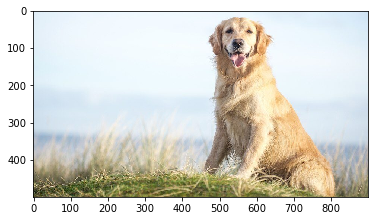

In [3]:
img = Image.open('dog.jpg')
plt.imshow(img)

In [4]:
model=models.vgg16(pretrained=True)

In [5]:
model.classifier[-1]

Linear(in_features=4096, out_features=1000, bias=True)

In [6]:
model.parameters

<bound method Module.parameters of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size

In [7]:
model.classifier[6]

Linear(in_features=4096, out_features=1000, bias=True)

In [8]:
CUDA =torch.cuda.is_available()

if CUDA:
    cud=model.cuda()

In [9]:
img=transform(img)

In [10]:
img.shape

torch.Size([3, 224, 224])

In [11]:
img=img.unsqueeze(0)

In [12]:
img.shape

torch.Size([1, 3, 224, 224])

In [13]:
if CUDA:
    img=img.cuda()

In [14]:
label

In [15]:
output.shape

torch.Size([1, 1000])

In [16]:
output=output.squeeze(0)

In [17]:
output.shape

torch.Size([1000])

In [18]:
labels=json.load(open('dog.json'))

In [19]:
index=output.max()

In [20]:
index

tensor(15.1675, device='cuda:0', grad_fn=<MaxBackward1>)

In [21]:
index=output.max(0)

In [22]:
print(index)

torch.return_types.max(
values=tensor(15.1675, device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor(207, device='cuda:0'))


In [23]:
labels

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [24]:
index = str(index[1][0].item())

IndexError: invalid index of a 0-dim tensor. Use tensor.item() to convert a 0-dim tensor to a Python number

In [25]:
index

torch.return_types.max(
values=tensor(15.1675, device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor(207, device='cuda:0'))

In [26]:
index = str(index[1].item())
label = labels[index][1]

In [27]:
index

'207'

In [28]:
label

'golden_retriever'

In [29]:
cud

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [30]:
cud.features.modules()

<generator object Module.modules at 0x0000017A89A85AC8>

In [31]:
cud_list = list(cud.features.modules())

In [32]:
cud_list

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (1): ReLU(inplace=True)
   (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (3): ReLU(inplace=True)
   (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (6): ReLU(inplace=True)
   (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (8): ReLU(inplace=True)
   (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (11): ReLU(inplace=True)
   (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (13): ReLU(inplace=True)
   (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (15): ReLU(inplace=True)
   (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (17): Conv2d(

In [33]:
cud_list[0]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [34]:
cud_list[1]

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [35]:
cud_list[2]

ReLU(inplace=True)

In [36]:
cud_list[3]

Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [37]:
output=[]
name=[]

for i in cud_list[1:]:
    img = i(img)
    output.append(img)
    name.append(str(i))

In [38]:
name

['Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)',
 'Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)',
 'Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)',
 'Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(

In [46]:
for feature_map in output:
    print(feature_map.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])


In [47]:
feature_map[-1].shape

torch.Size([512, 7, 7])

In [49]:
feature_map[-1].squeeze(0).shape

torch.Size([512, 7, 7])

In [53]:
processed=[]

for feature_map in output:
    feature_map = feature_map.squeeze(0)
    
    gray_scale=torch.sum(feature_map,0)
    gray_scale=gray_scale/feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())

In [51]:
a=torch.sum(feature_map[-1],0)

In [52]:
a

tensor([[ 46.6443,  27.7906, 103.4526, 481.9404, 555.2715, 349.1995,  65.1206],
        [ 18.5250,  22.2798, 203.4509, 579.4305, 398.5214, 479.7780,  44.6313],
        [ 25.5287,  24.9866, 109.2841, 519.0283, 487.3625, 349.2783,  55.7867],
        [ 41.0522,  31.7943,  83.2773, 258.1846, 271.9073, 136.0799,  60.0231],
        [ 50.8542,  26.3021,  53.8009, 251.4178, 236.7663, 158.7770,  89.9967],
        [ 30.5684,  20.4799,  39.8791, 199.9451, 264.3020, 295.0297, 167.6109],
        [ 67.2983,  42.0511,  45.5361,  73.5833, 130.0997, 174.3821, 117.1679]],
       device='cuda:0', grad_fn=<SumBackward1>)

In [56]:
len(processed)

31

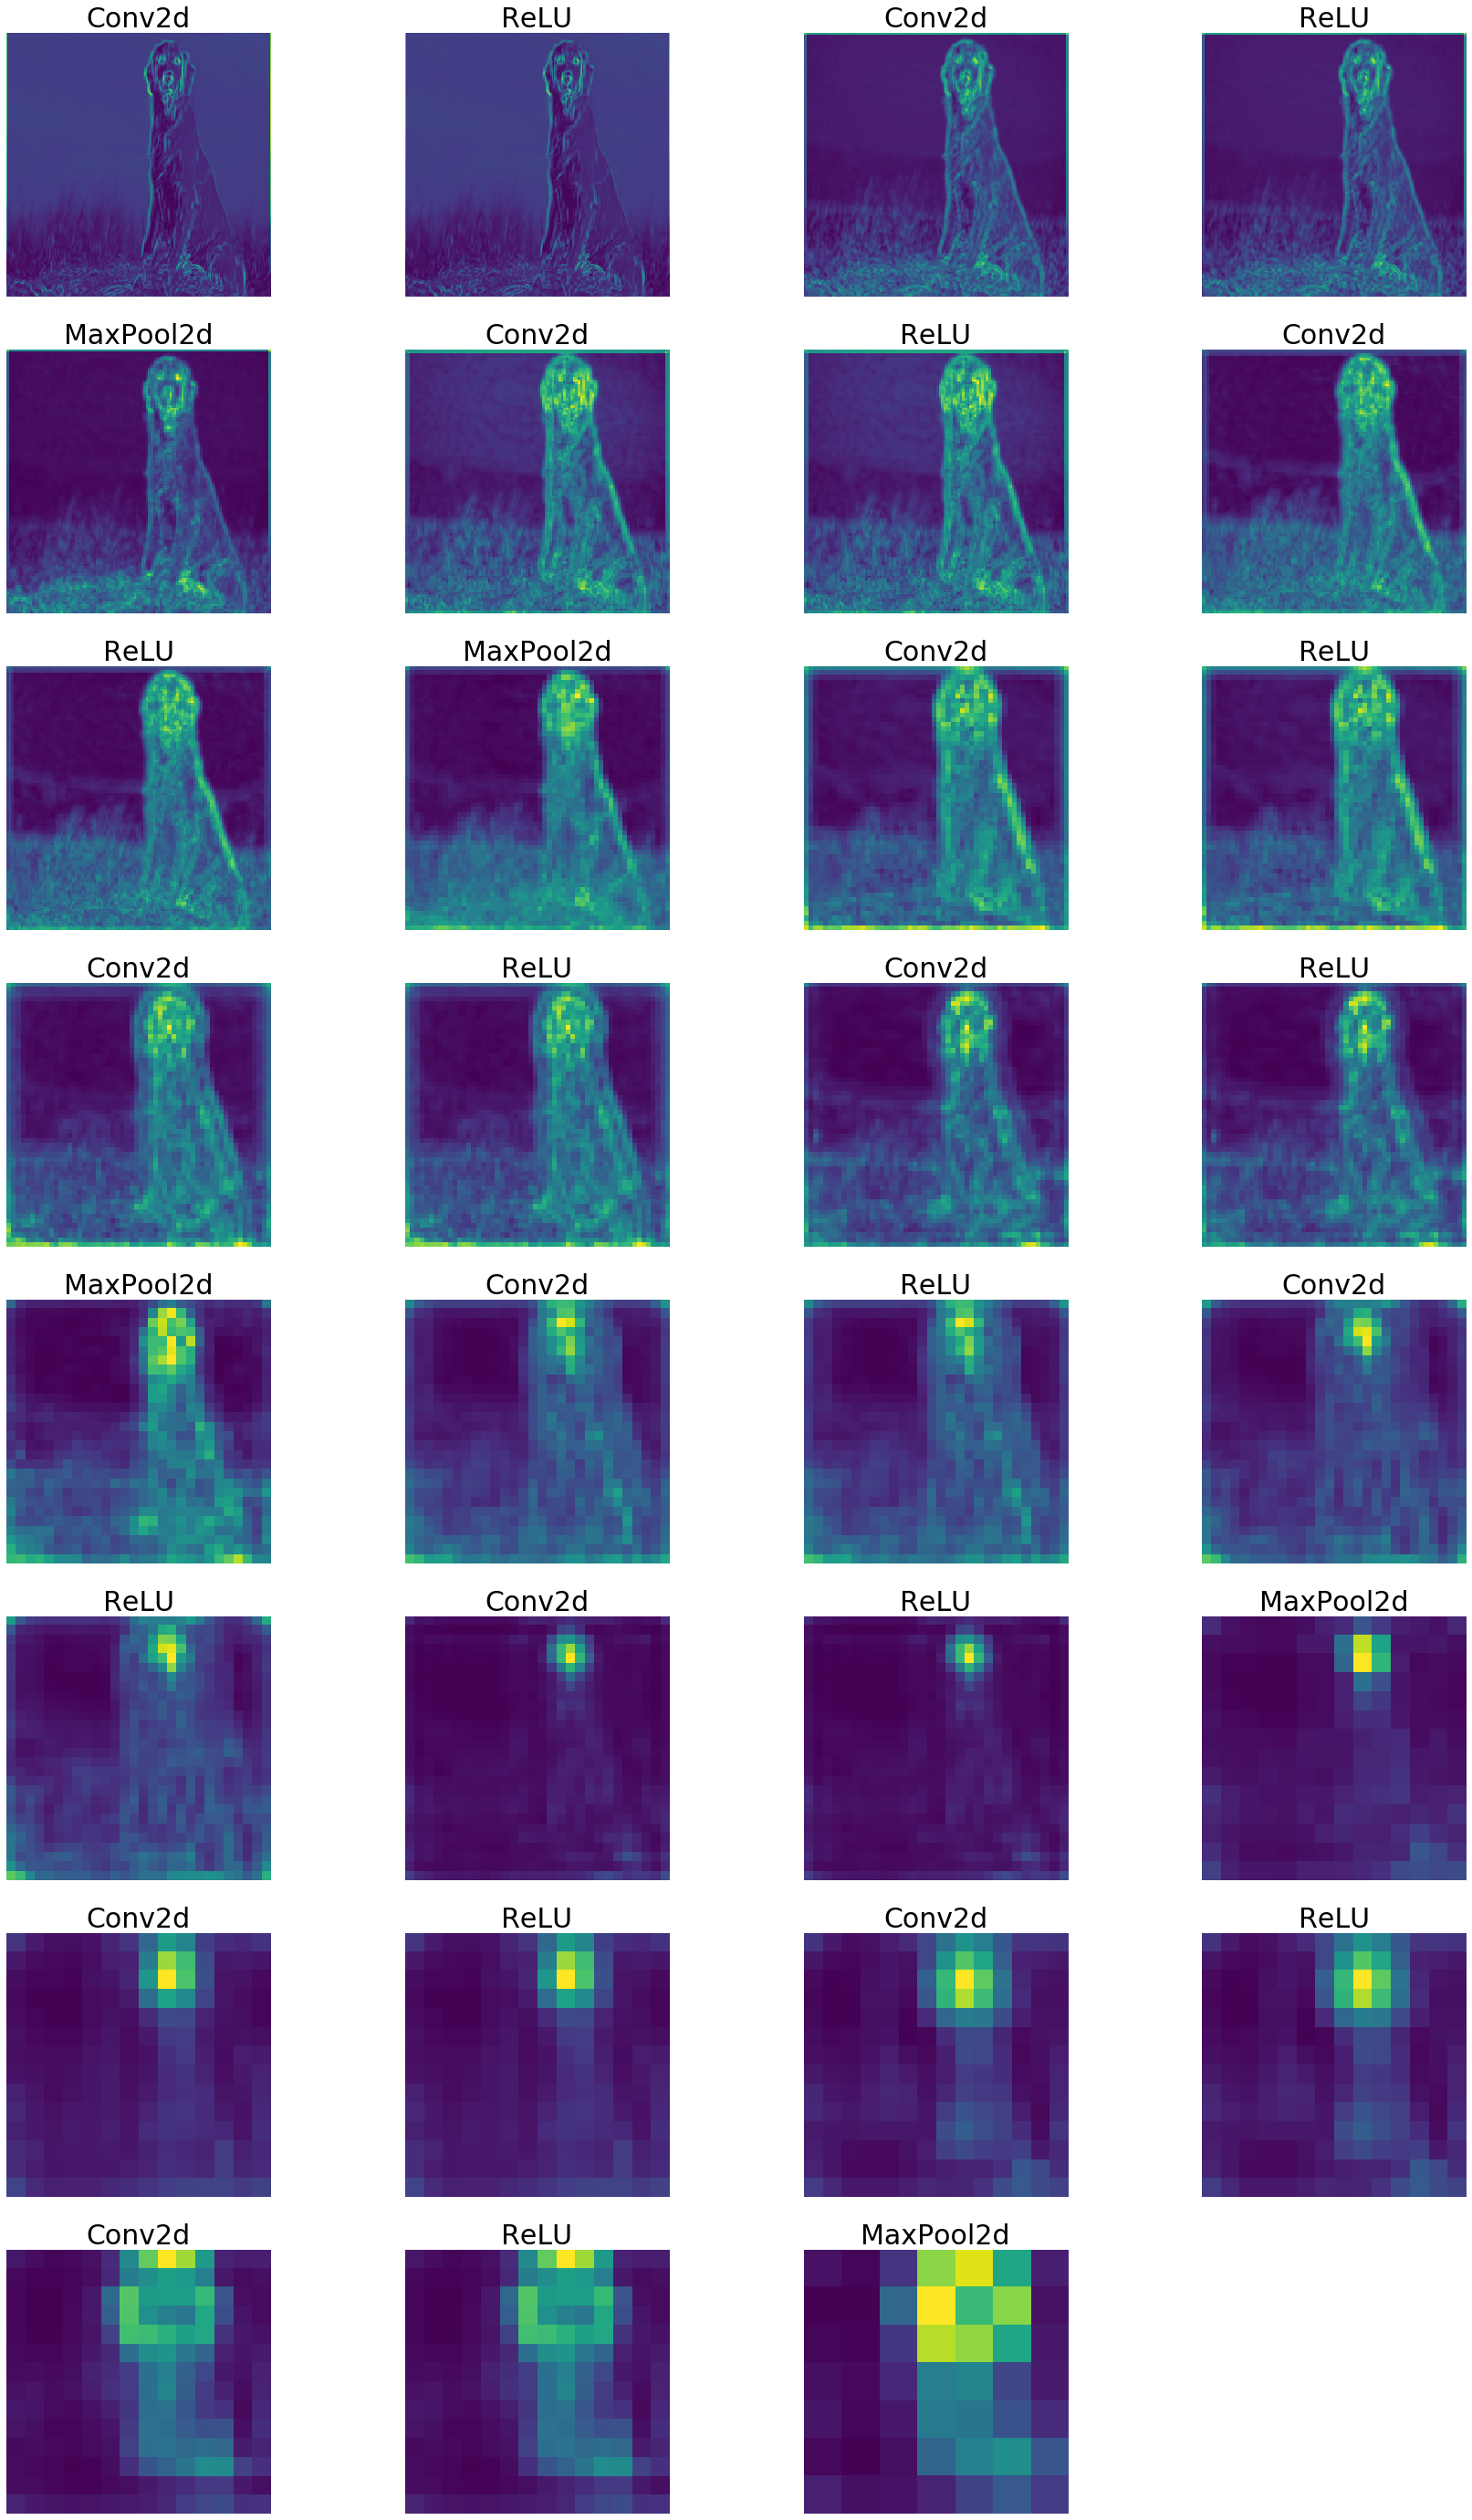

In [68]:
fig = plt.figure(figsize = (30,50))

for i in range(len(processed)):
    a = fig.add_subplot(8,4,i+1)
    imgplot = plt.imshow(processed[i])
    plt.axis('off')
    a.set_title(name[i].split('(')[0], fontsize=30)

plt.savefig('feature_maps.jpg', bbox_inches='tight')